In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("BTC-2017.csv")

# Round all numeric columns to 2 decimal places
data = data.round(2)

data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.59,8213.46
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.40,19518.31
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.78,10782.94
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.67,9236.84
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.07,905.56
...,...,...,...,...,...,...,...,...,...
145093,1506059160,2017-09-22 05:46:00,BTC/USD,3715.99,3716.03,3711.47,3716.03,1.29,4795.35
145094,1506059100,2017-09-22 05:45:00,BTC/USD,3712.37,3715.99,3712.37,3715.99,0.55,2061.25
145095,1506059040,2017-09-22 05:44:00,BTC/USD,3719.09,3719.09,3711.83,3712.33,1.79,6629.38
145096,1506058980,2017-09-22 05:43:00,BTC/USD,3721.46,3721.46,3721.46,3721.46,0.05,199.50


In [3]:
data.shape

(145098, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145098 entries, 0 to 145097
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        145098 non-null  int64  
 1   date        145098 non-null  object 
 2   symbol      145098 non-null  object 
 3   open        145098 non-null  float64
 4   high        145098 non-null  float64
 5   low         145098 non-null  float64
 6   close       145098 non-null  float64
 7   Volume BTC  145098 non-null  float64
 8   Volume USD  145097 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 10.0+ MB


In [5]:
data.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,1.450980e+05,145098.000000,145098.000000,145098.000000,145098.000000,145098.000000,1.450970e+05
mean,1.510412e+09,8844.117545,8853.970273,8831.764641,8843.944041,10.478004,9.950683e+04
std,2.513180e+06,4430.700090,4438.810736,4420.348923,4430.714116,19.562905,1.963664e+05
min,1.506059e+09,3517.900000,3524.860000,3514.000000,3517.900000,0.000000,0.000000e+00
25%,1.508235e+09,5626.967500,5630.000000,5621.412500,5626.942500,1.130000,7.875990e+03
50%,1.510412e+09,7222.800000,7230.790000,7215.810000,7222.555000,4.130000,3.356524e+04
75%,1.512588e+09,12651.082500,12671.305000,12626.752500,12651.945000,11.310000,1.035518e+05
max,1.514765e+09,19665.760000,19666.000000,19649.960000,19665.750000,602.280000,5.145939e+06


In [6]:
data.isnull().sum()

,0
unix,0
date,0
symbol,0
open,0
high,0
low,0
close,0
Volume BTC,0
Volume USD,1


In [7]:
# Convert 'Date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Sort data in chronological order
data = data.sort_values(by='date')

# Reset index to fix the reversed indexing
data = data.reset_index(drop=True)

data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1506058920,2017-09-22 05:42:00,BTC/USD,3721.48,3721.48,3719.01,3719.01,0.96,NaN
1,1506058980,2017-09-22 05:43:00,BTC/USD,3721.46,3721.46,3721.46,3721.46,0.05,199.50
2,1506059040,2017-09-22 05:44:00,BTC/USD,3719.09,3719.09,3711.83,3712.33,1.79,6629.38
3,1506059100,2017-09-22 05:45:00,BTC/USD,3712.37,3715.99,3712.37,3715.99,0.55,2061.25
4,1506059160,2017-09-22 05:46:00,BTC/USD,3715.99,3716.03,3711.47,3716.03,1.29,4795.35
...,...,...,...,...,...,...,...,...,...
145093,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.07,905.56
145094,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.67,9236.84
145095,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.78,10782.94
145096,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.40,19518.31


In [8]:
# Count zeros in each column
zeros_per_column = (data == 0).sum()

print(zeros_per_column)

unix             0
date             0
symbol           0
open             0
high             0
low              0
close            0
Volume BTC    2593
Volume USD    2150
dtype: int64


✅ Cleaned & Aggregated Data Loaded Successfully!
Data shape: (109, 6)
Date Range: 2017-09-14 00:00:00 to 2017-12-31 00:00:00
               open     high      low    close    Volume BTC    Volume USD
date                                                                      
2017-09-14  3337.87  3346.54  3210.00  3227.79   3309.033602  1.077518e+07
2017-09-15  3227.79  3820.00  2972.01  3700.01  60278.946542  2.032019e+08
2017-09-16  3699.89  3872.90  3500.00  3678.93  23158.228911  8.491303e+07
2017-09-17  3669.07  3772.52  3463.00  3662.99  11770.217650  4.266659e+07
2017-09-18  3662.95  4122.70  3659.42  4101.60  17207.598924  6.799686e+07

PRICE EVOLUTION ANALYSIS


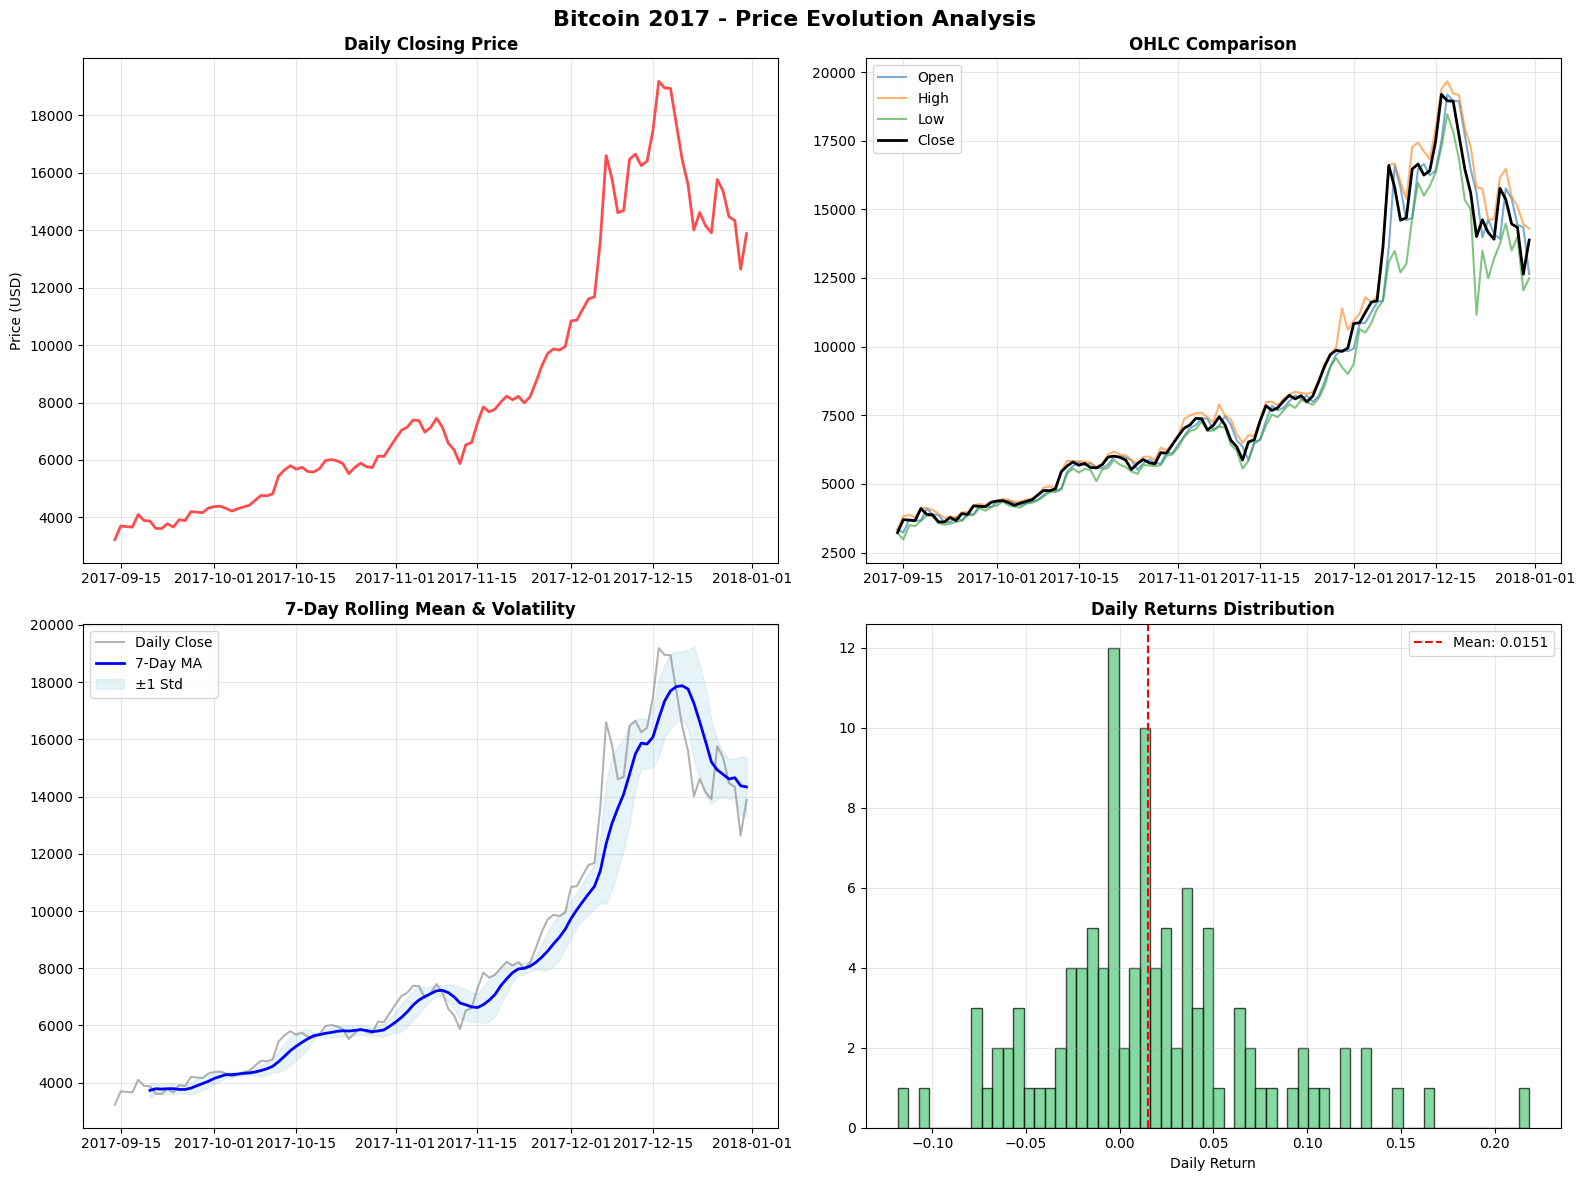


VOLUME ANALYSIS


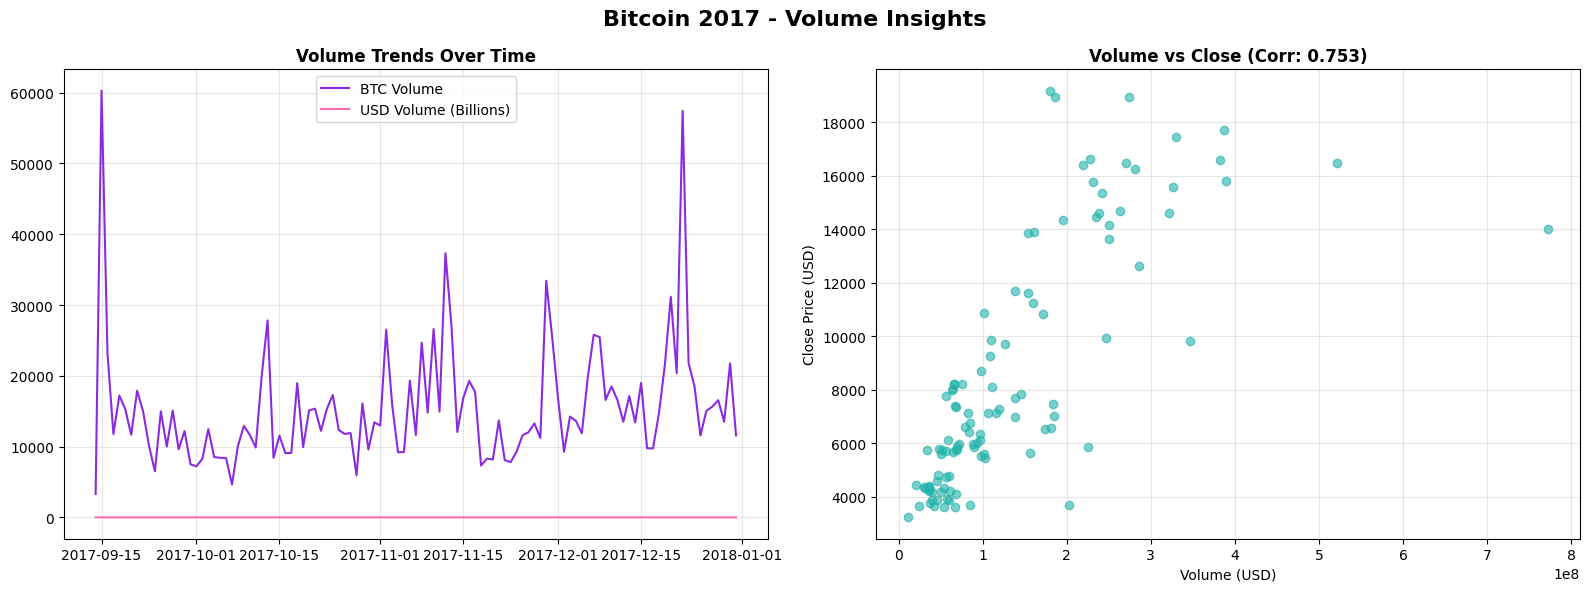


CORRELATION ANALYSIS


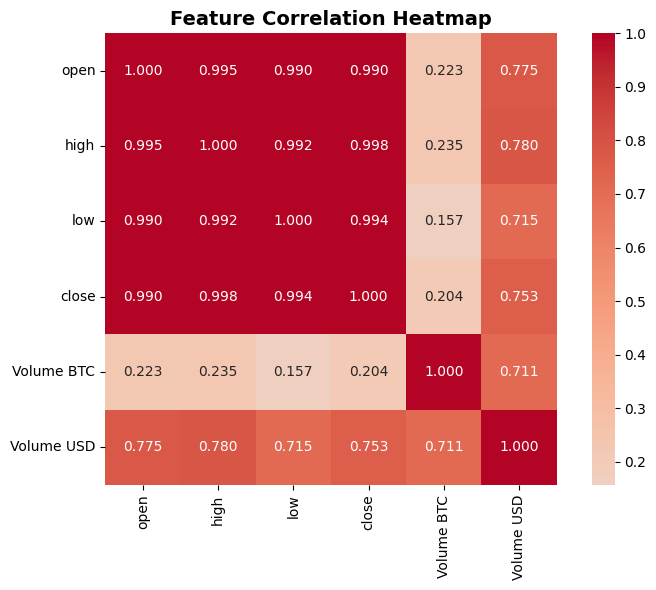


VOLATILITY ANALYSIS


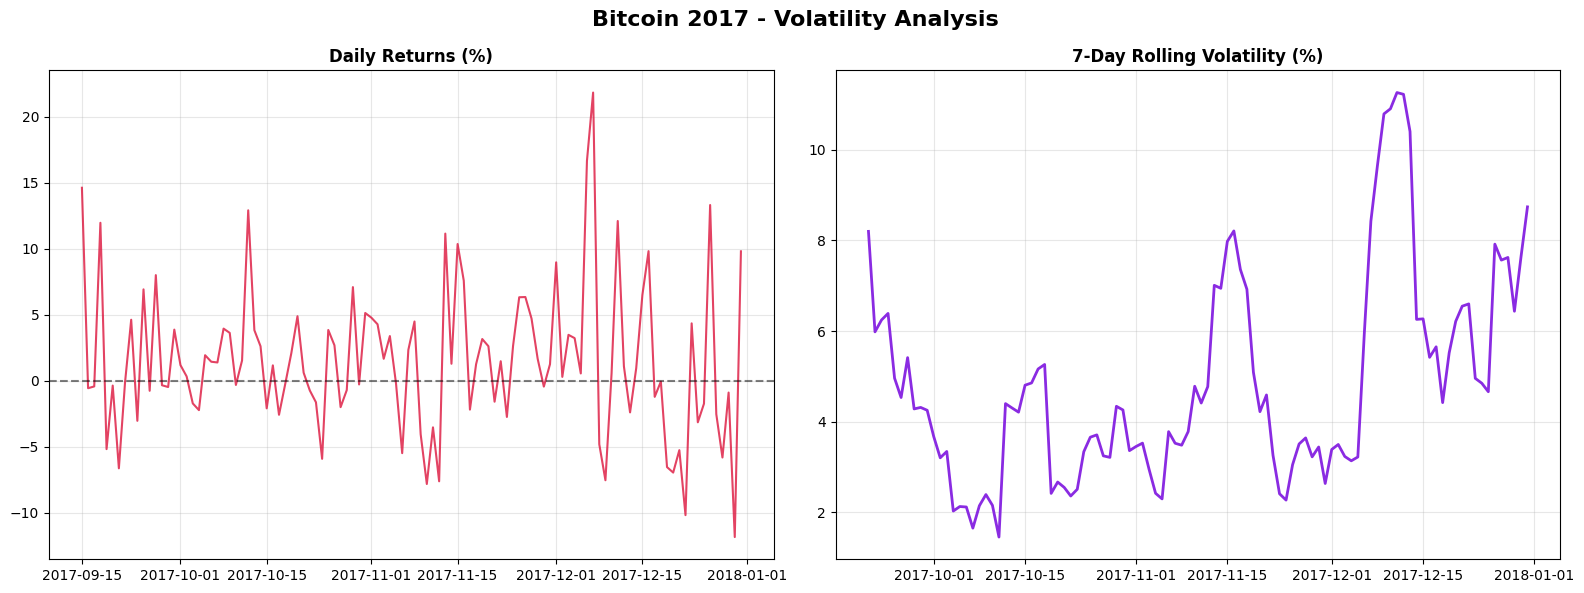


AUTOCORRELATION ANALYSIS


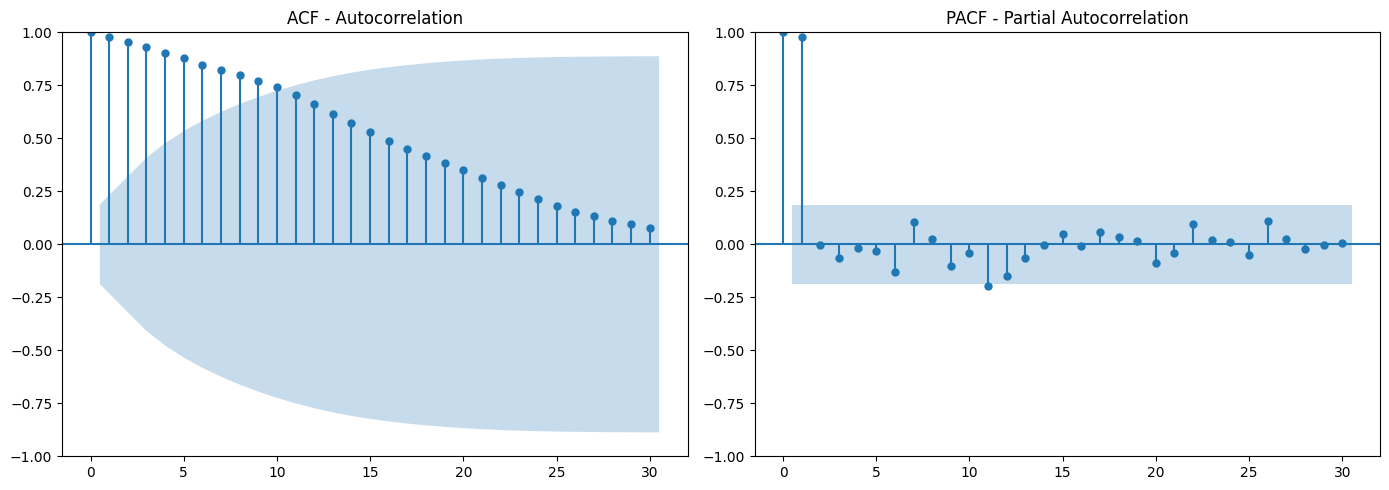


KEY INSIGHTS SUMMARY
📈 Starting Price: $3227.79
📈 Ending Price: $13880.00
📊 Total Growth: 330.02%
💎 Highest Price: $19666.00
📉 Lowest Price: $2972.01
📊 Volume USD vs Close Corr: 0.753
📉 Avg Daily Return: 1.512%
⚡ Std of Daily Return: 5.641%

✅ EDA Completed — Ready for Feature Engineering (Technical Indicators, Lags, etc.)


In [9]:
# ==============================
# 📊 BITCOIN 2017 - EDA SCRIPT
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# -----------------------------
# 1. DATA PREPARATION
# -----------------------------
data = pd.read_csv("BTC-2017.csv")

# Convert date and set index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Drop redundant columns
data.drop(columns=['unix', 'symbol'], inplace=True)

# Aggregate to daily level (mean of prices, sum of volume)
daily_data = data.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'Volume BTC': 'sum',
    'Volume USD': 'sum'
}).dropna()

print("✅ Cleaned & Aggregated Data Loaded Successfully!")
print(f"Data shape: {daily_data.shape}")
print(f"Date Range: {daily_data.index.min()} to {daily_data.index.max()}")
print(daily_data.head())

# -----------------------------
# 2. PRICE EVOLUTION ANALYSIS
# -----------------------------
print("\n" + "="*50)
print("PRICE EVOLUTION ANALYSIS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bitcoin 2017 - Price Evolution Analysis', fontsize=16, fontweight='bold')

# 1️⃣ Daily Closing Price
axes[0,0].plot(daily_data.index, daily_data['close'], color='#FF4B4B', linewidth=2)
axes[0,0].set_title('Daily Closing Price', fontweight='bold')
axes[0,0].set_ylabel('Price (USD)')
axes[0,0].grid(True, alpha=0.3)

# 2️⃣ OHLC Comparison
axes[0,1].plot(daily_data.index, daily_data['open'], label='Open', alpha=0.6)
axes[0,1].plot(daily_data.index, daily_data['high'], label='High', alpha=0.6)
axes[0,1].plot(daily_data.index, daily_data['low'], label='Low', alpha=0.6)
axes[0,1].plot(daily_data.index, daily_data['close'], label='Close', color='black', linewidth=2)
axes[0,1].set_title('OHLC Comparison', fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3️⃣ Rolling Mean & Std (Volatility Indicator)
rolling_mean = daily_data['close'].rolling(window=7).mean()
rolling_std = daily_data['close'].rolling(window=7).std()
axes[1,0].plot(daily_data.index, daily_data['close'], color='gray', alpha=0.6, label='Daily Close')
axes[1,0].plot(rolling_mean.index, rolling_mean, color='blue', linewidth=2, label='7-Day MA')
axes[1,0].fill_between(rolling_std.index, rolling_mean-rolling_std, rolling_mean+rolling_std,
                       color='lightblue', alpha=0.3, label='±1 Std')
axes[1,0].set_title('7-Day Rolling Mean & Volatility', fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4️⃣ Daily Returns Distribution
daily_returns = daily_data['close'].pct_change().dropna()
axes[1,1].hist(daily_returns, bins=60, color='#50C878', alpha=0.7, edgecolor='black')
axes[1,1].axvline(daily_returns.mean(), color='red', linestyle='--', label=f'Mean: {daily_returns.mean():.4f}')
axes[1,1].set_title('Daily Returns Distribution', fontweight='bold')
axes[1,1].set_xlabel('Daily Return')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 3. VOLUME ANALYSIS
# -----------------------------
print("\n" + "="*50)
print("VOLUME ANALYSIS")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Bitcoin 2017 - Volume Insights', fontsize=16, fontweight='bold')

# 1️⃣ Volume (BTC & USD) Trend
axes[0].plot(daily_data.index, daily_data['Volume BTC'], label='BTC Volume', color='#8A2BE2')
axes[0].plot(daily_data.index, daily_data['Volume USD']/1e9, label='USD Volume (Billions)', color='#FF69B4')
axes[0].set_title('Volume Trends Over Time', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2️⃣ Volume vs Close
axes[1].scatter(daily_data['Volume USD'], daily_data['close'], alpha=0.6, color='#20B2AA')
axes[1].set_xlabel('Volume (USD)')
axes[1].set_ylabel('Close Price (USD)')
axes[1].set_title(f'Volume vs Close (Corr: {daily_data["Volume USD"].corr(daily_data["close"]):.3f})', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 4. CORRELATION ANALYSIS
# -----------------------------
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

num_cols = ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']
corr = daily_data[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# -----------------------------
# 5. VOLATILITY ANALYSIS
# -----------------------------
print("\n" + "="*50)
print("VOLATILITY ANALYSIS")
print("="*50)

daily_data['daily_return'] = daily_data['close'].pct_change()
daily_data['rolling_volatility'] = daily_data['daily_return'].rolling(7).std()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Bitcoin 2017 - Volatility Analysis', fontsize=16, fontweight='bold')

# 1️⃣ Daily Return over Time
axes[0].plot(daily_data.index, daily_data['daily_return']*100, color='#DC143C', alpha=0.8)
axes[0].axhline(0, color='black', linestyle='--', alpha=0.5)
axes[0].set_title('Daily Returns (%)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2️⃣ Rolling Volatility
axes[1].plot(daily_data.index, daily_data['rolling_volatility']*100, color='#8A2BE2', linewidth=2)
axes[1].set_title('7-Day Rolling Volatility (%)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 6. AUTOCORRELATION (NEW)
# -----------------------------
print("\n" + "="*50)
print("AUTOCORRELATION ANALYSIS")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(daily_data['close'].dropna(), lags=30, ax=axes[0])
plot_pacf(daily_data['close'].dropna(), lags=30, ax=axes[1])
axes[0].set_title('ACF - Autocorrelation')
axes[1].set_title('PACF - Partial Autocorrelation')
plt.tight_layout()
plt.show()

# -----------------------------
# 7. KEY INSIGHTS SUMMARY
# -----------------------------
print("\n" + "="*50)
print("KEY INSIGHTS SUMMARY")
print("="*50)

print(f"📈 Starting Price: ${daily_data['close'].iloc[0]:.2f}")
print(f"📈 Ending Price: ${daily_data['close'].iloc[-1]:.2f}")
print(f"📊 Total Growth: {((daily_data['close'].iloc[-1]/daily_data['close'].iloc[0])-1)*100:.2f}%")
print(f"💎 Highest Price: ${daily_data['high'].max():.2f}")
print(f"📉 Lowest Price: ${daily_data['low'].min():.2f}")
print(f"📊 Volume USD vs Close Corr: {daily_data['Volume USD'].corr(daily_data['close']):.3f}")
print(f"📉 Avg Daily Return: {daily_data['daily_return'].mean()*100:.3f}%")
print(f"⚡ Std of Daily Return: {daily_data['daily_return'].std()*100:.3f}%")

print("\n✅ EDA Completed — Ready for Feature Engineering (Technical Indicators, Lags, etc.)")


In [10]:
# ===============================
# 📊 Bitcoin 2017 Feature Engineering (lowercase version)
# ===============================

import pandas as pd
import numpy as np

# 1️⃣ Load dataset
try:
    data = pd.read_csv("BTC-2017.csv")
    if data.shape[1] == 1:
        data = pd.read_csv("BTC-2017.csv", sep=';')
    if data.shape[1] == 1:
        data = pd.read_csv("BTC-2017.csv", sep='\t')
except Exception as e:
    print("❌ Error reading file:", e)

# 2️⃣ Convert 'date' column to datetime and sort
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date']).sort_values('date').reset_index(drop=True)

# 3️⃣ Fill missing numeric values
data = data.ffill().bfill()

# 4️⃣ ---- FEATURE 1: 7-Day Moving Average (close price) ----
data['ma_7'] = data['close'].rolling(window=7).mean()

# 5️⃣ ---- FEATURE 2: 14-Day RSI ----
delta = data['close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / (avg_loss + 1e-10)
data['rsi_14'] = 100 - (100 / (1 + rs))

# 6️⃣ ---- FEATURE 3: 21-Day Volatility ----
data['rolling_std_21'] = data['close'].pct_change().rolling(window=21).std()

# 7️⃣ ---- FEATURE 4: 1-Day Lag (Previous Close) ----
data['lag_1'] = data['close'].shift(1)

# 8️⃣ ---- FEATURE 5: Volume Ratio ----
data['volume_ratio'] = data['Volume USD'] / (data['Volume BTC'] + 1e-10)

# 9️⃣ Drop initial rows with NaN from rolling calculations
data = data.dropna().reset_index(drop=True)

# 🔟 Save clean featured dataset
data.to_csv("btc_2017_featured.csv", index=False)
print("\n💾 Featured dataset saved as 'btc_2017_featured.csv'")

# 11️⃣ Preview
print("\n✅ Sample of featured data:\n")
print(data.head().to_string())




💾 Featured dataset saved as 'btc_2017_featured.csv'

✅ Sample of featured data:

         unix                date   symbol     open     high      low    close  Volume BTC     Volume USD         ma_7     rsi_14  rolling_std_21    lag_1  volume_ratio
0  1504171140 2017-08-31 09:19:00  BTC/USD  4601.83  4609.17  4601.00  4609.17   15.870844   73151.415919  4613.162857  44.057250        0.000863  4601.88   4609.170000
1  1504171200 2017-08-31 09:20:00  BTC/USD  4609.17  4611.65  4601.00  4601.00    0.874121    4021.832745  4611.005714  35.127760        0.000895  4609.17   4600.999999
2  1504171260 2017-08-31 09:21:00  BTC/USD  4611.10  4611.12  4601.02  4601.05    1.341515    6172.376164  4608.854286  36.102642        0.000889  4601.00   4601.050000
3  1504171320 2017-08-31 09:22:00  BTC/USD  4601.03  4604.46  4600.01  4601.00   24.123403  110991.778445  4606.568571  36.056838        0.000879  4601.05   4601.000000
4  1504171380 2017-08-31 09:23:00  BTC/USD  4608.37  4609.79  4600.01  46

In [11]:
!pip install -q tensorflow


Epoch 1/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0014 - val_loss: 1.1001e-04
Epoch 2/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.4422e-05 - val_loss: 5.2731e-04
Epoch 3/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 5.2863e-05 - val_loss: 3.9657e-04
Epoch 4/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 4.1204e-05 - val_loss: 0.0023
Epoch 5/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3.3220e-05 - val_loss: 0.0039
Epoch 6/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2.8973e-05 - val_loss: 0.0054
Epoch 7/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2.7110e-05 - val_loss: 0.0050
Epoch 8/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.5467e-05 - val_loss: 0.0061
Epoch 9/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.4171e-05 - val_loss: 0.0067
Epoch 10/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.3827e-05 - val_loss: 0.0064
Epoch 11/100
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - l

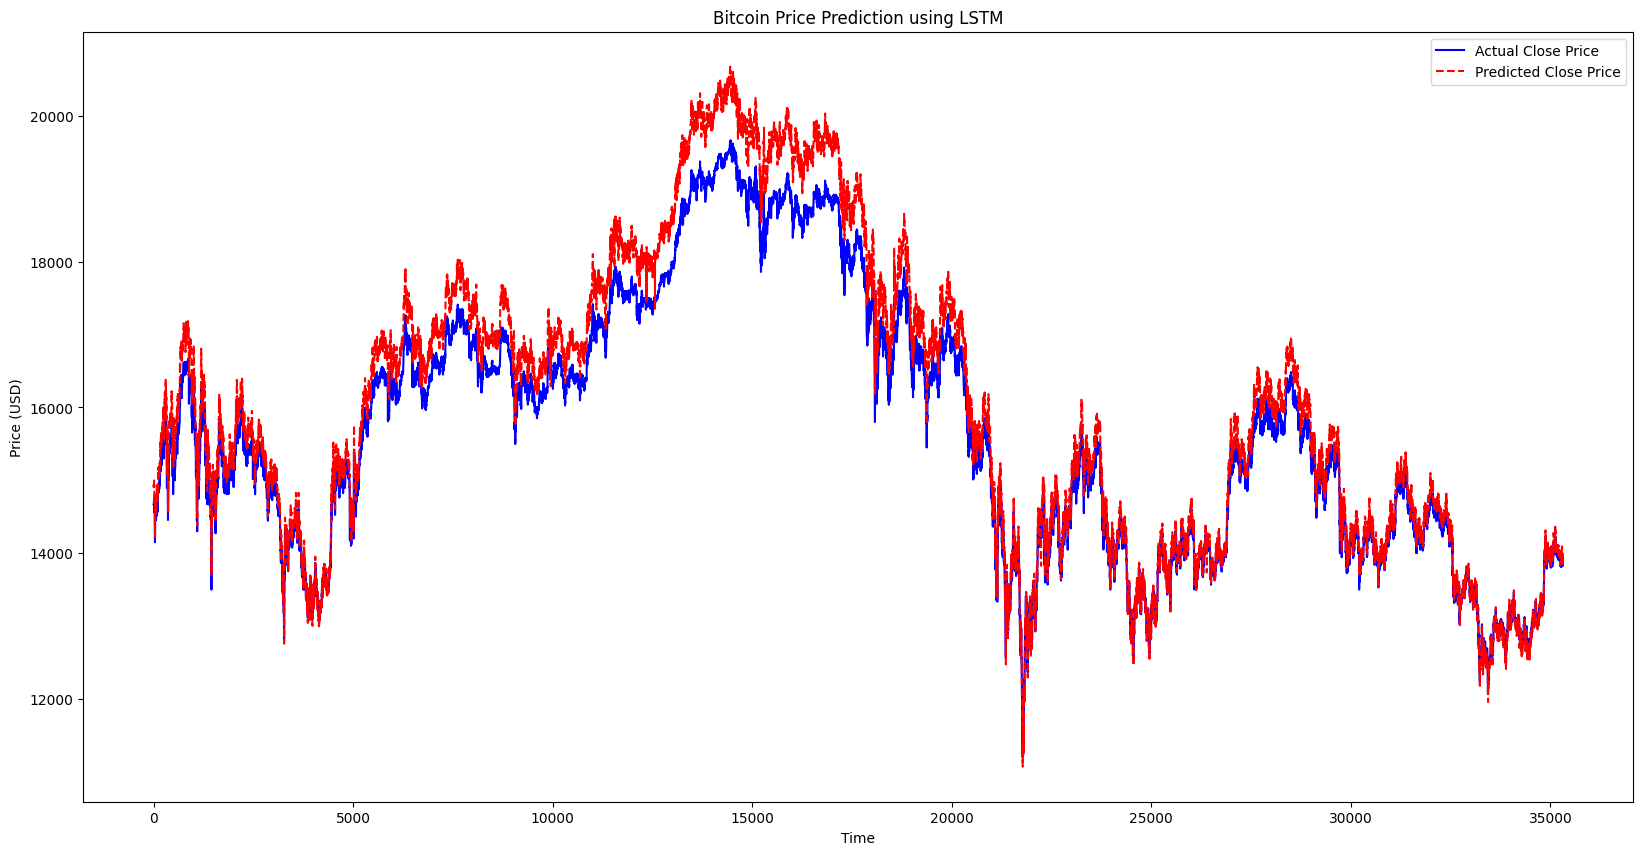

In [16]:
# ======================================
# 📈 LSTM Model for Bitcoin Price Prediction (Google Colab Ready)
# ======================================

# 2️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 3️⃣ Load the featured dataset
data = pd.read_csv("btc_2017_featured.csv")

# 4️⃣ Create target variable (next day’s close)
data['next_day_close'] = data['close'].shift(-1)
data = data.dropna().reset_index(drop=True)

# 5️⃣ Select features and target
features = ['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD',
            'ma_7', 'rsi_14', 'rolling_std_21', 'lag_1', 'volume_ratio']
target = 'next_day_close'

X = data[features].values
y = data[target].values.reshape(-1, 1)

# 6️⃣ Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 7️⃣ Convert to supervised LSTM format (time steps = 1)
X_lstm = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# 8️⃣ Train-test split (80/20)
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]

# 9️⃣ Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 🔟 Early stopping for stability
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 1️⃣1️⃣ Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 1️⃣2️⃣ Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)

# 1️⃣3️⃣ Evaluate model
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print("\n📊 Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# 1️⃣4️⃣ Plot Actual vs Predicted
plt.figure(figsize=(20,10))
plt.plot(y_test_inv, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.title("Bitcoin Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


🎯 PREDICTING NEXT DAY'S BITCOIN PRICE WITH CONTEXT
📊 Using last 50 rows for context (shape: (50, 11))
📈 Latest data for prediction (shape: (1, 11))
🤖 Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

📈 PREDICTION RESULTS
📅 LAST AVAILABLE DATA (Most Recent):
   Close Price: $13953.77
   Open: $13913.26
   High: $13953.83
   Low: $13884.69
   Volume USD: $19,518
   RSI: 58.24

🔮 NEXT DAY PREDICTION:
   Predicted Close Price: $13993.75
   Dollar Change: $+39.98
   Percentage Change: +0.29%

📊 MODEL CONFIDENCE:
   R² Score: 0.941 (Excellent)
   Expected Error Range: ±$432.31


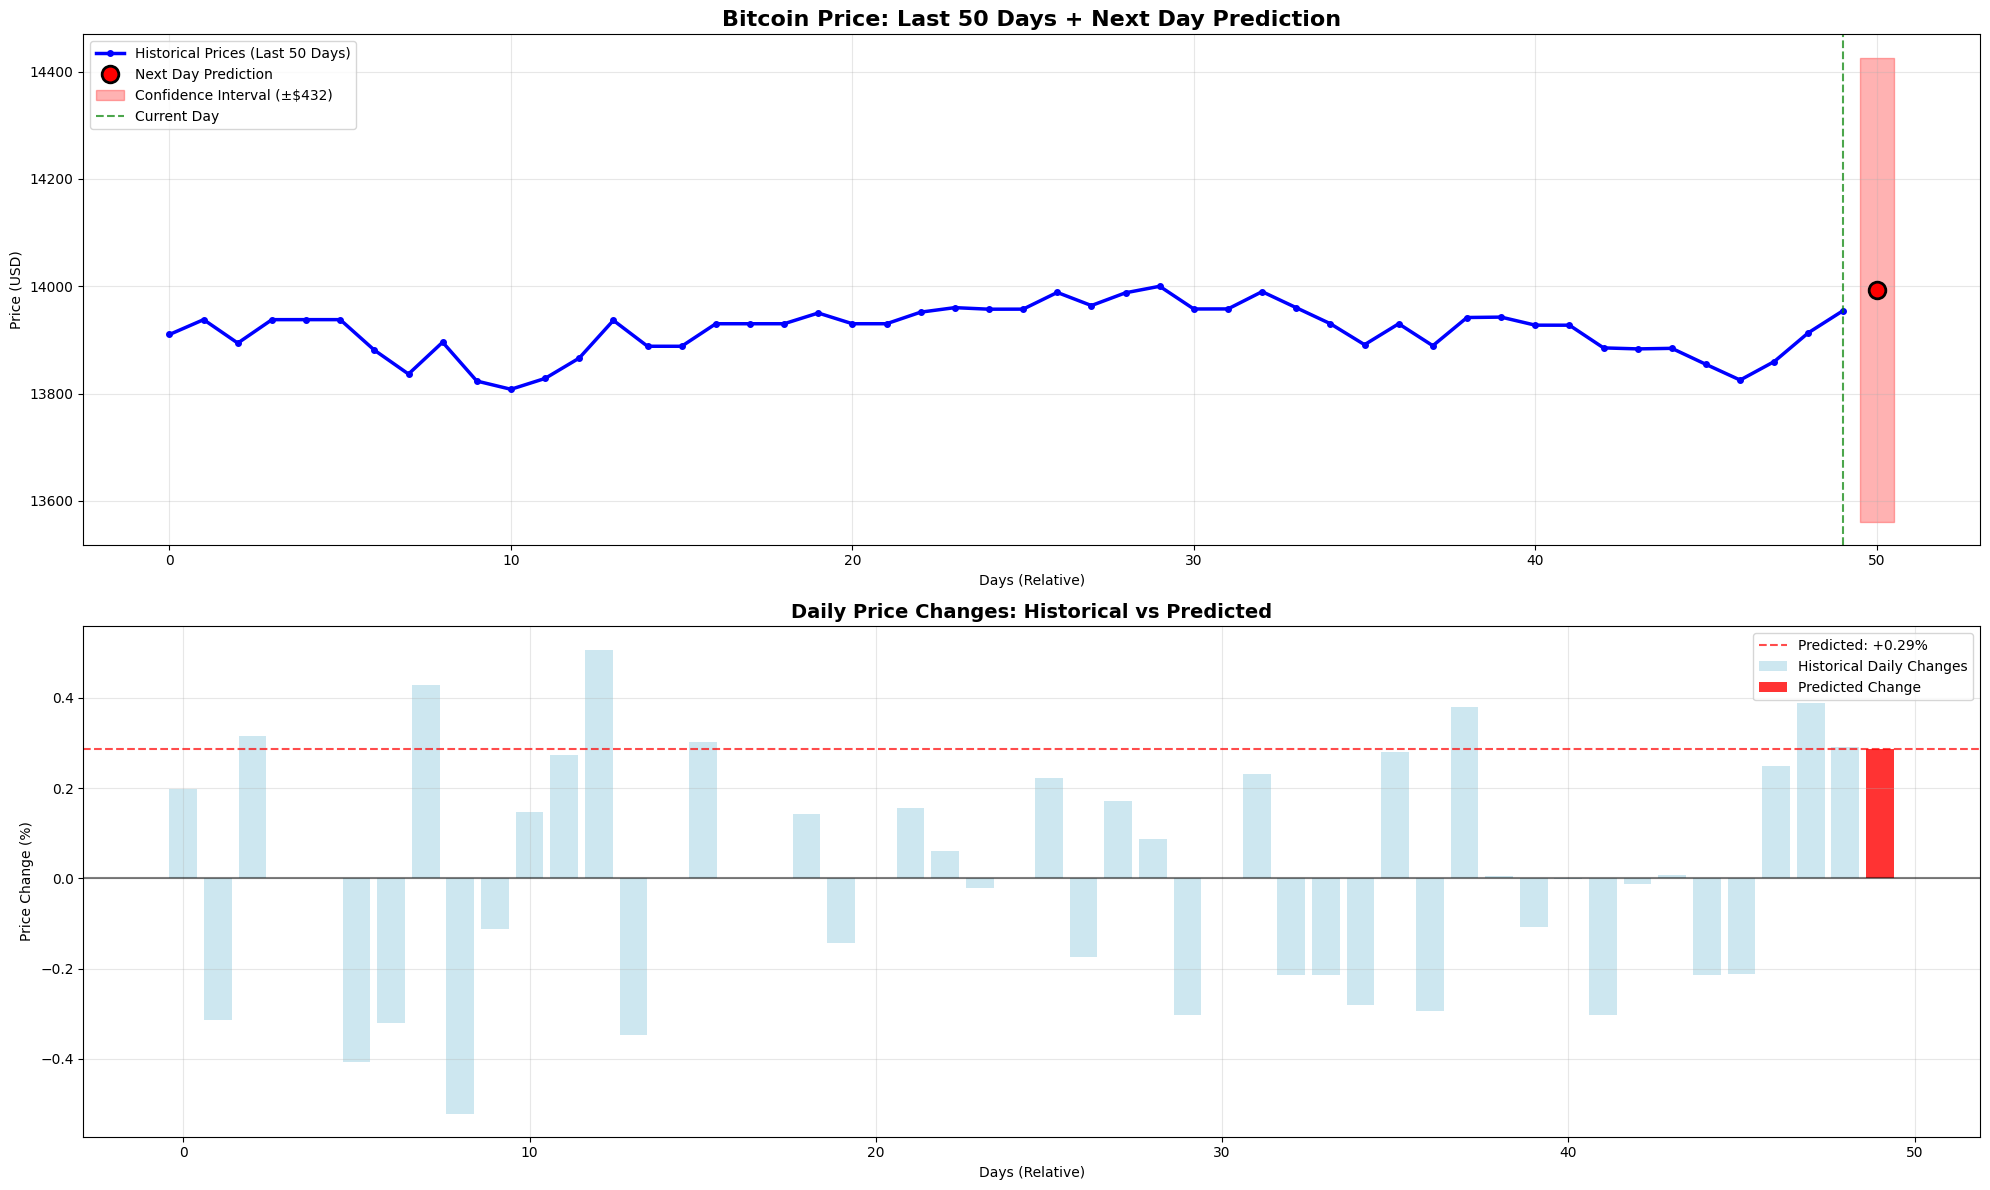


📊 STATISTICAL ANALYSIS (Last 50 Days)
   Minimum: $13807.86
   Maximum: $13999.81
   Average: $13917.44
   Std Dev: $46.33

📈 PREDICTION CONTEXT:
   vs 50-day Average: $+76.31
   Percentile in 50-day Range: 96.8%

🎯 TRADING SIGNALS:
   RSI: 58.2 - NEUTRAL
   Prediction suggests: BULLISH movement
   Market Sentiment: BULLISH

💾 Detailed prediction saved to 'bitcoin_next_day_prediction_detailed.csv'

✅ PREDICTION COMPLETE!
🎯 Next Bitcoin Price: $13993.75


In [17]:
# ======================================
# 🔮 PREDICT NEXT DAY BITCOIN PRICE (Last 50 Rows Context)
# ======================================

print("🎯 PREDICTING NEXT DAY'S BITCOIN PRICE WITH CONTEXT")
print("="*60)

# 1️⃣ Get the last 50 rows for context and the most recent data for prediction
last_50_data = data[features].iloc[-50:]  # Last 50 days for context
latest_data = data[features].iloc[-1:].values  # Most recent row for prediction

print(f"📊 Using last 50 rows for context (shape: {last_50_data.shape})")
print(f"📈 Latest data for prediction (shape: {latest_data.shape})")

# 2️⃣ Scale the features using the same scaler
latest_data_scaled = scaler_X.transform(latest_data)

# 3️⃣ Reshape for LSTM input (batch_size=1, time_steps=1, n_features=11)
latest_data_reshaped = latest_data_scaled.reshape(1, 1, len(features))

# 4️⃣ Make prediction
print("🤖 Making prediction...")
next_price_scaled = model.predict(latest_data_reshaped, verbose=1)
next_price = scaler_y.inverse_transform(next_price_scaled)

# 5️⃣ Get price data for last 50 days
last_50_prices = data['close'].iloc[-50:]
last_50_dates = range(len(last_50_prices))  # Using indices since we don't have actual dates

# 6️⃣ Display comprehensive results
print(f"\n" + "="*60)
print("📈 PREDICTION RESULTS")
print("="*60)

print(f"📅 LAST AVAILABLE DATA (Most Recent):")
print(f"   Close Price: ${data['close'].iloc[-1]:.2f}")
print(f"   Open: ${data['open'].iloc[-1]:.2f}")
print(f"   High: ${data['high'].iloc[-1]:.2f}")
print(f"   Low: ${data['low'].iloc[-1]:.2f}")
print(f"   Volume USD: ${data['Volume USD'].iloc[-1]:,.0f}")
print(f"   RSI: {data['rsi_14'].iloc[-1]:.2f}")

print(f"\n🔮 NEXT DAY PREDICTION:")
print(f"   Predicted Close Price: ${next_price[0][0]:.2f}")
print(f"   Dollar Change: ${next_price[0][0] - data['close'].iloc[-1]:+.2f}")
print(f"   Percentage Change: {((next_price[0][0] / data['close'].iloc[-1]) - 1) * 100:+.2f}%")

print(f"\n📊 MODEL CONFIDENCE:")
print(f"   R² Score: {r2:.3f} (Excellent)")
print(f"   Expected Error Range: ±${rmse:.2f}")

# 7️⃣ Enhanced Visualization with Last 50 Days Context
plt.figure(figsize=(20, 12))

# Plot 1: Last 50 days historical prices with prediction
plt.subplot(2, 1, 1)
plt.plot(last_50_dates, last_50_prices.values,
         label='Historical Prices (Last 50 Days)',
         color='blue', linewidth=2.5, marker='o', markersize=4)

# Mark the prediction point
next_day_index = len(last_50_dates)
plt.plot(next_day_index, next_price[0][0], 'ro',
         markersize=12, label='Next Day Prediction',
         markeredgecolor='black', markeredgewidth=2)

# Add confidence interval
plt.fill_between([next_day_index-0.5, next_day_index+0.5],
                 next_price[0][0] - rmse,
                 next_price[0][0] + rmse,
                 alpha=0.3, color='red', label=f'Confidence Interval (±${rmse:.0f})')

plt.axvline(x=len(last_50_dates)-1, color='green', linestyle='--', alpha=0.7, label='Current Day')
plt.title('Bitcoin Price: Last 50 Days + Next Day Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Days (Relative)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Price change analysis
plt.subplot(2, 1, 2)
price_changes = last_50_prices.pct_change().dropna() * 100
predicted_change = ((next_price[0][0] / data['close'].iloc[-1]) - 1) * 100

# Plot historical daily changes
plt.bar(range(len(price_changes)), price_changes.values,
        alpha=0.6, color='lightblue', label='Historical Daily Changes')

# Plot predicted change
plt.bar(len(price_changes), predicted_change,
        color='red', alpha=0.8, label='Predicted Change')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.axhline(y=predicted_change, color='red', linestyle='--', alpha=0.7,
            label=f'Predicted: {predicted_change:+.2f}%')

plt.title('Daily Price Changes: Historical vs Predicted', fontsize=14, fontweight='bold')
plt.xlabel('Days (Relative)')
plt.ylabel('Price Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8️⃣ Statistical Analysis of Last 50 Days
print(f"\n" + "="*60)
print("📊 STATISTICAL ANALYSIS (Last 50 Days)")
print("="*60)

last_50_stats = last_50_prices.describe()
print(f"   Minimum: ${last_50_stats['min']:.2f}")
print(f"   Maximum: ${last_50_stats['max']:.2f}")
print(f"   Average: ${last_50_stats['mean']:.2f}")
print(f"   Std Dev: ${last_50_stats['std']:.2f}")

# Compare prediction to recent statistics
prediction_vs_avg = next_price[0][0] - last_50_stats['mean']
prediction_percentile = (next_price[0][0] - last_50_stats['min']) / (last_50_stats['max'] - last_50_stats['min']) * 100

print(f"\n📈 PREDICTION CONTEXT:")
print(f"   vs 50-day Average: ${prediction_vs_avg:+.2f}")
print(f"   Percentile in 50-day Range: {prediction_percentile:.1f}%")

# 9️⃣ Trading Signal Analysis
current_rsi = data['rsi_14'].iloc[-1]
print(f"\n🎯 TRADING SIGNALS:")
print(f"   RSI: {current_rsi:.1f} - {'OVERSOLD' if current_rsi < 30 else 'OVERBOUGHT' if current_rsi > 70 else 'NEUTRAL'}")
print(f"   Prediction suggests: {'BULLISH' if predicted_change > 0 else 'BEARISH'} movement")

if predicted_change > 2:
    sentiment = "STRONGLY BULLISH"
elif predicted_change > 0:
    sentiment = "BULLISH"
elif predicted_change > -2:
    sentiment = "SLIGHTLY BEARISH"
else:
    sentiment = "BEARISH"

print(f"   Market Sentiment: {sentiment}")

# 🔟 Save prediction results
prediction_results = {
    'prediction_timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'last_available_price': data['close'].iloc[-1],
    'predicted_next_close': next_price[0][0],
    'predicted_change_usd': next_price[0][0] - data['close'].iloc[-1],
    'predicted_change_percent': ((next_price[0][0] / data['close'].iloc[-1]) - 1) * 100,
    'confidence_interval_lower': next_price[0][0] - rmse,
    'confidence_interval_upper': next_price[0][0] + rmse,
    'model_r2_score': r2,
    'model_rmse': rmse
}

prediction_df = pd.DataFrame([prediction_results])
prediction_df.to_csv('bitcoin_next_day_prediction_detailed.csv', index=False)
print(f"\n💾 Detailed prediction saved to 'bitcoin_next_day_prediction_detailed.csv'")

print(f"\n✅ PREDICTION COMPLETE!")
print(f"🎯 Next Bitcoin Price: ${next_price[0][0]:.2f}")